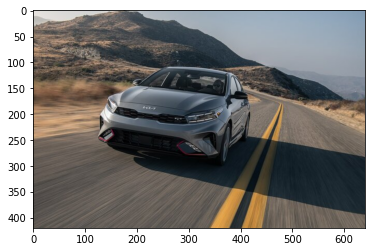

In [42]:
#Input image
import matplotlib.pyplot  as plt
import numpy as np
from torchvision.io.image import read_image

img = read_image("car.jpg")

plt.imshow(np.transpose(img, (1, 2, 0)))
plt.show()

In [1]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

img = read_image("car.jpg")

# Step 1: Initialize model with the best available weights

weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=4, font_size=30)
im = to_pil_image(box.detach())
im.show()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth


  0%|          | 0.00/167M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:237: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


In [18]:
prediction

{'boxes': tensor([[125.5735, 105.2958, 420.8549, 300.0829],
         [345.9858, 133.3331, 367.4940, 160.7003]], grad_fn=<StackBackward0>),
 'labels': tensor([3, 1]),
 'scores': tensor([0.9979, 0.9076], grad_fn=<IndexBackward0>)}

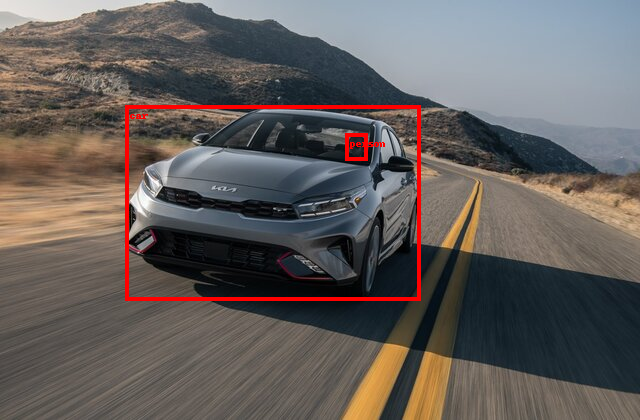

In [14]:
im

In [78]:
from google.colab.patches import cv2_imshow
import cv2

def draw_box(image, box): #inputs are numpy array, Function to display image with it's bounding boxes
  img = image.cpu().numpy()
  img = img.copy()
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  for i,b in enumerate(box):
    x1 =  int(b[0].item())
    y1 = int(b[1].item())
    x2 = int(b[2].item())
    y2 = int(b[3].item())
    
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
    cv2.putText(img, weights.meta["categories"][prediction['labels'][i].item()] , (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (26,269,0), 2)

  #plotting using cv2
  cv2_imshow(img)
  cv2.waitKey(0)
  #Platting using matplotlib
  plt.imshow(img)
  plt.show()
  return

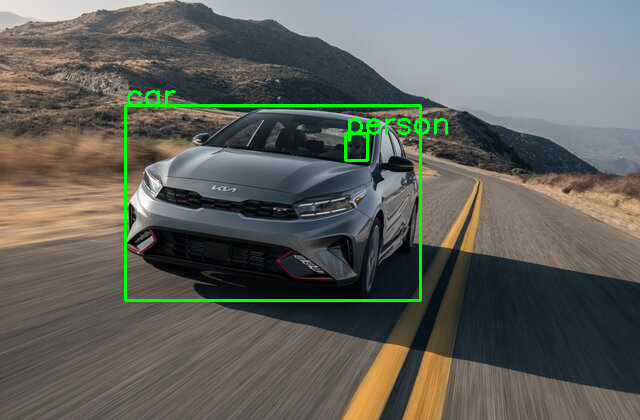

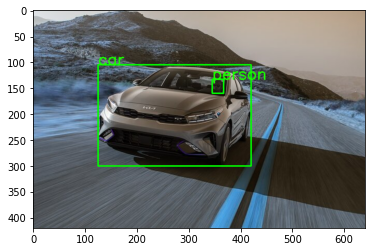

In [79]:
draw_box(img.permute(1,2,0), prediction['boxes'])